# Load & Inspect Data

In [ ]:
import pandas as pd

df = pd.read_csv("ott_viewer_dropoff_retention_us_v1.0.csv")
df.head()

,show_id,title,platform,genre,release_year,season_number,episode_number,episode_duration_min,pacing_score,hook_strength,...,pause_count,rewind_count,skip_intro,cognitive_load,attention_required,night_watch_safe,drop_off,drop_off_probability,retention_risk,dataset_version
0,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016,1,1,48,4,5,...,3,0,0,9,high,0,1,0.649,high,v1.0
1,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016,1,2,55,5,4,...,3,3,1,5,medium,0,0,0.473,medium,v1.0
2,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016,1,3,51,4,8,...,4,2,0,9,high,0,0,0.583,medium,v1.0
3,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016,1,4,50,4,7,...,4,1,0,7,high,0,0,0.520,medium,v1.0
4,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016,1,5,52,4,3,...,3,0,1,7,high,0,1,0.638,high,v1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33171 entries, 0 to 33170
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   show_id               33171 non-null  int64  
 1   title                 33171 non-null  object 
 2   platform              33171 non-null  object 
 3   genre                 33171 non-null  object 
 4   release_year          33171 non-null  int64  
 5   season_number         33171 non-null  int64  
 6   episode_number        33171 non-null  int64  
 7   episode_duration_min  33171 non-null  int64  
 8   pacing_score          33171 non-null  int64  
 9   hook_strength         33171 non-null  int64  
 10  dialogue_density      33171 non-null  object 
 11  visual_intensity      33171 non-null  int64  
 12  avg_watch_percentage  33171 non-null  int64  
 13  pause_count           33171 non-null  int64  
 14  rewind_count          33171 non-null  int64  
 15  skip_intro         

# Target Variable

In [ ]:
target = "drop_off_probability"

# Required Columns

In [ ]:
use_cols = [
    "episode_number",
    "episode_duration_min",
    "avg_watch_percentage",
    "drop_off_probability",
    "pause_count",
    "rewind_count",
    "cognitive_load",
    "pacing_score",
    "genre",
    "retention_risk"
]

df = df[use_cols]

# CORE EDA

# Drop-off vs Episode Number

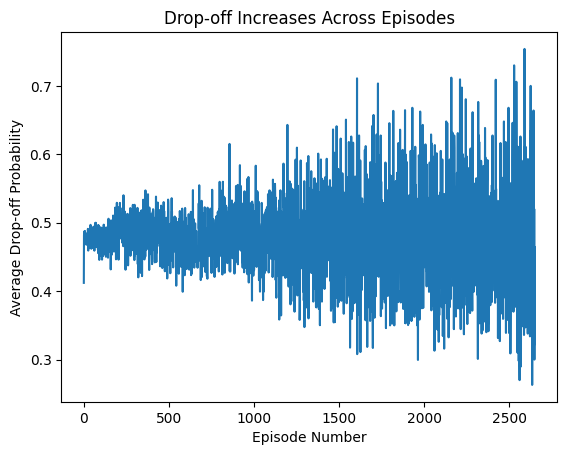

In [ ]:
import matplotlib.pyplot as plt

ep_drop = df.groupby("episode_number")["drop_off_probability"].mean()

plt.figure()
ep_drop.plot()
plt.xlabel("Episode Number")
plt.ylabel("Average Drop-off Probability")
plt.title("Drop-off Increases Across Episodes")
plt.show()

# Cognitive Load vs Drop-off

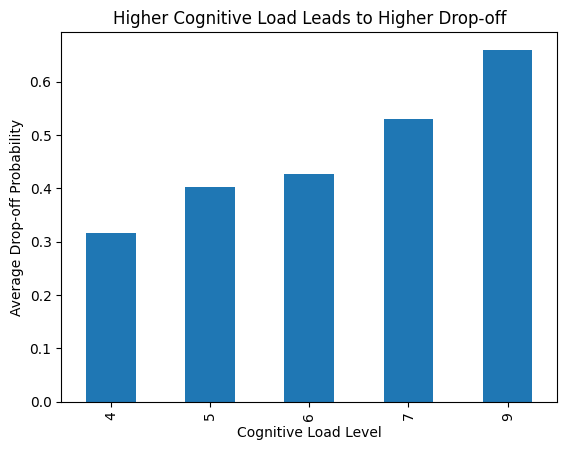

In [ ]:
cog_drop = df.groupby("cognitive_load")["drop_off_probability"].mean()

plt.figure()
cog_drop.plot(kind="bar")
plt.xlabel("Cognitive Load Level")
plt.ylabel("Average Drop-off Probability")
plt.title("Higher Cognitive Load Leads to Higher Drop-off")
plt.show()

#Episode Duration vs Watch Completion

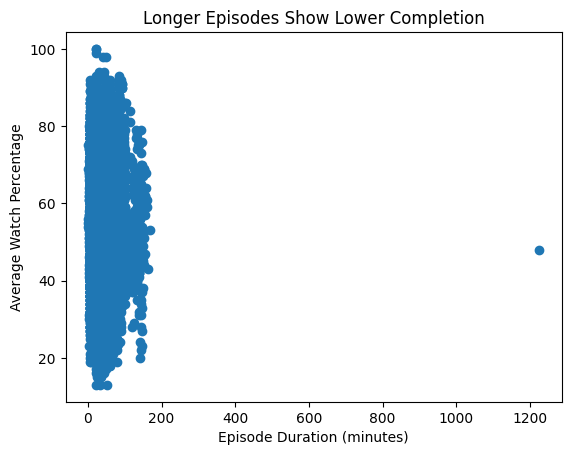

In [ ]:
plt.figure()
plt.scatter(df["episode_duration_min"], df["avg_watch_percentage"])
plt.xlabel("Episode Duration (minutes)")
plt.ylabel("Average Watch Percentage")
plt.title("Longer Episodes Show Lower Completion")
plt.show()

# SEGMENTATION

In [ ]:
df.groupby("retention_risk")["avg_watch_percentage"].mean()

,avg_watch_percentage
retention_risk,
high,37.082639
low,81.175130
medium,59.405335


In [ ]:
df.groupby("retention_risk")["drop_off_probability"].mean()

,drop_off_probability
retention_risk,
high,0.655519
low,0.275348
medium,0.454539
